importing all necesary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fractions import Fraction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import math

calling and analysing the dataset

In [2]:
dataset=pd.read_csv("dnd_monsters.csv")

In [3]:
dataset.head(6)

,name,url,cr,type,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
0,aarakocra,https://www.aidedd.org/dnd/monstres.php?vo=aar...,1/4,humanoid (aarakocra),Medium,12,13,fly,neutral good,NaN,Monster Manual (BR),10.0,14.0,10.0,11.0,12.0,11.0
1,abjurer,NaN,9,humanoid (any race),Medium,12,84,NaN,any alignment,NaN,Volo's Guide to Monsters,NaN,NaN,NaN,NaN,NaN,NaN
2,aboleth,https://www.aidedd.org/dnd/monstres.php?vo=abo...,10,aberration,Large,17,135,swim,lawful evil,Legendary,Monster Manual (SRD),21.0,9.0,15.0,18.0,15.0,18.0
3,abominable-yeti,NaN,9,monstrosity,Huge,15,137,NaN,chaotic evil,NaN,Monster Manual,NaN,NaN,NaN,NaN,NaN,NaN
4,acererak,NaN,23,undead,Medium,21,285,NaN,neutral evil,NaN,Adventures (Tomb of Annihilation),NaN,NaN,NaN,NaN,NaN,NaN
5,acolyte,https://www.aidedd.org/dnd/monstres.php?vo=aco...,1/4,humanoid (any race),Medium,10,9,NaN,any alignment,NaN,Monster Manual (SRD),10.0,10.0,10.0,10.0,14.0,11.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       762 non-null    object 
 1   url        401 non-null    object 
 2   cr         761 non-null    object 
 3   type       762 non-null    object 
 4   size       762 non-null    object 
 5   ac         762 non-null    int64  
 6   hp         762 non-null    int64  
 7   speed      248 non-null    object 
 8   align      762 non-null    object 
 9   legendary  43 non-null     object 
 10  source     762 non-null    object 
 11  str        401 non-null    float64
 12  dex        401 non-null    float64
 13  con        401 non-null    float64
 14  int        401 non-null    float64
 15  wis        401 non-null    float64
 16  cha        401 non-null    float64
dtypes: float64(6), int64(2), object(9)
memory usage: 101.3+ KB


In [5]:
dataset['str'].isnull().sum()

361

dropping unnecesary columns

In [6]:
dataset.drop(['url','type'], 
        axis=1, 
        inplace=True)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       762 non-null    object 
 1   cr         761 non-null    object 
 2   size       762 non-null    object 
 3   ac         762 non-null    int64  
 4   hp         762 non-null    int64  
 5   speed      248 non-null    object 
 6   align      762 non-null    object 
 7   legendary  43 non-null     object 
 8   source     762 non-null    object 
 9   str        401 non-null    float64
 10  dex        401 non-null    float64
 11  con        401 non-null    float64
 12  int        401 non-null    float64
 13  wis        401 non-null    float64
 14  cha        401 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 89.4+ KB


filling in defalt values for speed and legendaries to fill in null values

In [8]:
dataset['speed'].fillna('normal', inplace=True)

In [9]:
dataset.head()

,name,cr,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
0,aarakocra,1/4,Medium,12,13,fly,neutral good,NaN,Monster Manual (BR),10.0,14.0,10.0,11.0,12.0,11.0
1,abjurer,9,Medium,12,84,normal,any alignment,NaN,Volo's Guide to Monsters,NaN,NaN,NaN,NaN,NaN,NaN
2,aboleth,10,Large,17,135,swim,lawful evil,Legendary,Monster Manual (SRD),21.0,9.0,15.0,18.0,15.0,18.0
3,abominable-yeti,9,Huge,15,137,normal,chaotic evil,NaN,Monster Manual,NaN,NaN,NaN,NaN,NaN,NaN
4,acererak,23,Medium,21,285,normal,neutral evil,NaN,Adventures (Tomb of Annihilation),NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dataset['legendary'].fillna('not legendary', inplace=True)

In [11]:
dataset.head()

,name,cr,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
0,aarakocra,1/4,Medium,12,13,fly,neutral good,not legendary,Monster Manual (BR),10.0,14.0,10.0,11.0,12.0,11.0
1,abjurer,9,Medium,12,84,normal,any alignment,not legendary,Volo's Guide to Monsters,NaN,NaN,NaN,NaN,NaN,NaN
2,aboleth,10,Large,17,135,swim,lawful evil,Legendary,Monster Manual (SRD),21.0,9.0,15.0,18.0,15.0,18.0
3,abominable-yeti,9,Huge,15,137,normal,chaotic evil,not legendary,Monster Manual,NaN,NaN,NaN,NaN,NaN,NaN
4,acererak,23,Medium,21,285,normal,neutral evil,not legendary,Adventures (Tomb of Annihilation),NaN,NaN,NaN,NaN,NaN,NaN


dropping entries with missing stats

In [12]:
fd=dataset.dropna()
fd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401 entries, 0 to 760
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       401 non-null    object 
 1   cr         401 non-null    object 
 2   size       401 non-null    object 
 3   ac         401 non-null    int64  
 4   hp         401 non-null    int64  
 5   speed      401 non-null    object 
 6   align      401 non-null    object 
 7   legendary  401 non-null    object 
 8   source     401 non-null    object 
 9   str        401 non-null    float64
 10  dex        401 non-null    float64
 11  con        401 non-null    float64
 12  int        401 non-null    float64
 13  wis        401 non-null    float64
 14  cha        401 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 50.1+ KB


In [13]:
fd.head()

,name,cr,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
0,aarakocra,1/4,Medium,12,13,fly,neutral good,not legendary,Monster Manual (BR),10.0,14.0,10.0,11.0,12.0,11.0
2,aboleth,10,Large,17,135,swim,lawful evil,Legendary,Monster Manual (SRD),21.0,9.0,15.0,18.0,15.0,18.0
5,acolyte,1/4,Medium,10,9,normal,any alignment,not legendary,Monster Manual (SRD),10.0,10.0,10.0,10.0,14.0,11.0
6,adult-black-dragon,14,Huge,19,195,"fly, swim",chaotic evil,Legendary,Monster Manual (SRD),23.0,14.0,21.0,14.0,13.0,17.0
8,adult-blue-dragon,16,Huge,19,225,fly,lawful evil,Legendary,Monster Manual (SRD),25.0,10.0,23.0,16.0,15.0,19.0


In [14]:
fd.describe()

,ac,hp,str,dex,con,int,wis,cha
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,14.109726,81.463840,15.231920,12.745636,15.147132,8.324190,11.820449,10.097257
std,3.165111,98.069768,6.492964,3.183573,4.383012,5.694264,3.093167,5.696755
min,5.000000,1.000000,1.000000,1.000000,8.000000,1.000000,2.000000,1.000000
25%,12.000000,19.000000,11.000000,10.000000,12.000000,3.000000,10.000000,6.000000
50%,13.000000,45.000000,16.000000,13.000000,14.000000,8.000000,12.000000,9.000000
75%,17.000000,112.000000,19.000000,15.000000,17.000000,12.000000,13.000000,14.000000
max,25.000000,676.000000,30.000000,28.000000,30.000000,26.000000,27.000000,30.000000


In [15]:
fd['speed'].value_counts()

speed
normal       229
fly          101
swim          49
fly, swim     22
Name: count, dtype: int64

In [16]:
fd['align'].value_counts()

align
unaligned                   137
chaotic evil                 66
neutral evil                 50
lawful evil                  46
neutral                      27
lawful good                  19
any alignment                16
chaotic good                 13
neutral good                  7
chaotic neutral               6
lawful neutral                4
any non-good alignment        4
any non-lawful alignment      2
any chaotic alignment         2
neutral good                  1
any evil alignment            1
Name: count, dtype: int64

In [17]:
fd['size'].value_counts()

size
Medium        169
Large         123
Huge           40
Small          27
Tiny           26
Gargantuan     16
Name: count, dtype: int64

In [18]:
fd['cr'].value_counts()

cr
2      52
1/4    44
1/2    34
1      32
5      31
0      30
3      29
1/8    21
4      18
6      15
9      11
8      10
7       9
11      8
10      8
13      7
21      6
16      5
17      5
15      4
20      4
14      4
23      3
26      2
12      2
24      2
22      2
19      1
18      1
30      1
Name: count, dtype: int64

In [19]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401 entries, 0 to 760
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       401 non-null    object 
 1   cr         401 non-null    object 
 2   size       401 non-null    object 
 3   ac         401 non-null    int64  
 4   hp         401 non-null    int64  
 5   speed      401 non-null    object 
 6   align      401 non-null    object 
 7   legendary  401 non-null    object 
 8   source     401 non-null    object 
 9   str        401 non-null    float64
 10  dex        401 non-null    float64
 11  con        401 non-null    float64
 12  int        401 non-null    float64
 13  wis        401 non-null    float64
 14  cha        401 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 50.1+ KB


converting cr column into float type

In [20]:
fd['cr'].value_counts()

cr
2      52
1/4    44
1/2    34
1      32
5      31
0      30
3      29
1/8    21
4      18
6      15
9      11
8      10
7       9
11      8
10      8
13      7
21      6
16      5
17      5
15      4
20      4
14      4
23      3
26      2
12      2
24      2
22      2
19      1
18      1
30      1
Name: count, dtype: int64

fraction_str2 = '3/2'
float_result2 = float(Fraction(fraction_str2))
float_result2
type(float_result2)

In [21]:
fd=fd.copy()

In [22]:
fd['cr'] = fd['cr'].apply(lambda x: float(Fraction(x)))

In [23]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401 entries, 0 to 760
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       401 non-null    object 
 1   cr         401 non-null    float64
 2   size       401 non-null    object 
 3   ac         401 non-null    int64  
 4   hp         401 non-null    int64  
 5   speed      401 non-null    object 
 6   align      401 non-null    object 
 7   legendary  401 non-null    object 
 8   source     401 non-null    object 
 9   str        401 non-null    float64
 10  dex        401 non-null    float64
 11  con        401 non-null    float64
 12  int        401 non-null    float64
 13  wis        401 non-null    float64
 14  cha        401 non-null    float64
dtypes: float64(7), int64(2), object(6)
memory usage: 50.1+ KB


In [24]:
fd['cr'].mean()

4.644950124688279

visually analysing the dataset

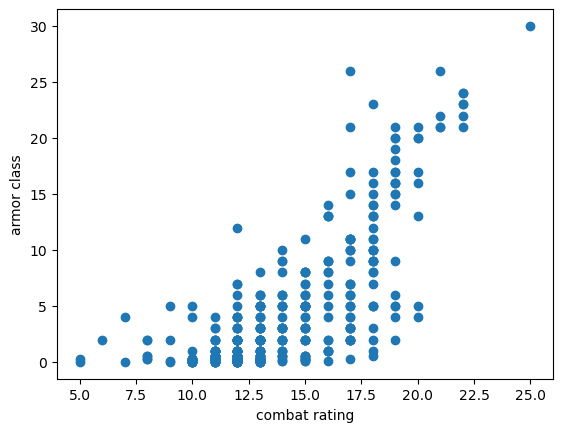

In [25]:
plt.scatter(fd['ac'],
            fd['cr'])
plt.xlabel("combat rating")
plt.ylabel("armor class")
plt.show()

In [26]:
corr=fd[['cr','ac','hp','str','dex','con','int','wis','cha']].corr()
print(corr)

           cr        ac        hp       str       dex       con       int  \
cr   1.000000  0.745623  0.939353  0.689633  0.015118  0.849184  0.631230   
ac   0.745623  1.000000  0.704310  0.589242  0.212426  0.686334  0.598366   
hp   0.939353  0.704310  1.000000  0.729654 -0.037904  0.871122  0.528713   
str  0.689633  0.589242  0.729654  1.000000 -0.192704  0.837820  0.345380   
dex  0.015118  0.212426 -0.037904 -0.192704  1.000000 -0.156051  0.248794   
con  0.849184  0.686334  0.871122  0.837820 -0.156051  1.000000  0.480193   
int  0.631230  0.598366  0.528713  0.345380  0.248794  0.480193  1.000000   
wis  0.584899  0.498176  0.499466  0.372775  0.343922  0.451155  0.649557   
cha  0.708334  0.642748  0.625515  0.461420  0.235432  0.583351  0.899798   

          wis       cha  
cr   0.584899  0.708334  
ac   0.498176  0.642748  
hp   0.499466  0.625515  
str  0.372775  0.461420  
dex  0.343922  0.235432  
con  0.451155  0.583351  
int  0.649557  0.899798  
wis  1.000000  0.7255

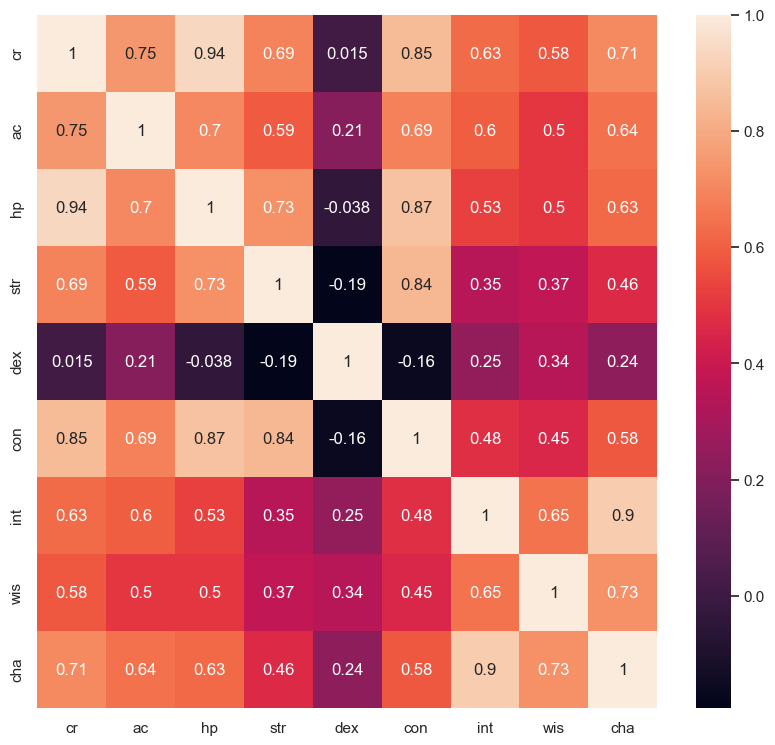

In [27]:
sns.set(rc = {'figure.figsize': (10, 9)})
sns.heatmap(corr, annot = True)
plt.show()

C:\Users\gavin\AppData\Local\Temp\ipykernel_16088\3386933817.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'con', y = 'cr', ci = None, data = fd)


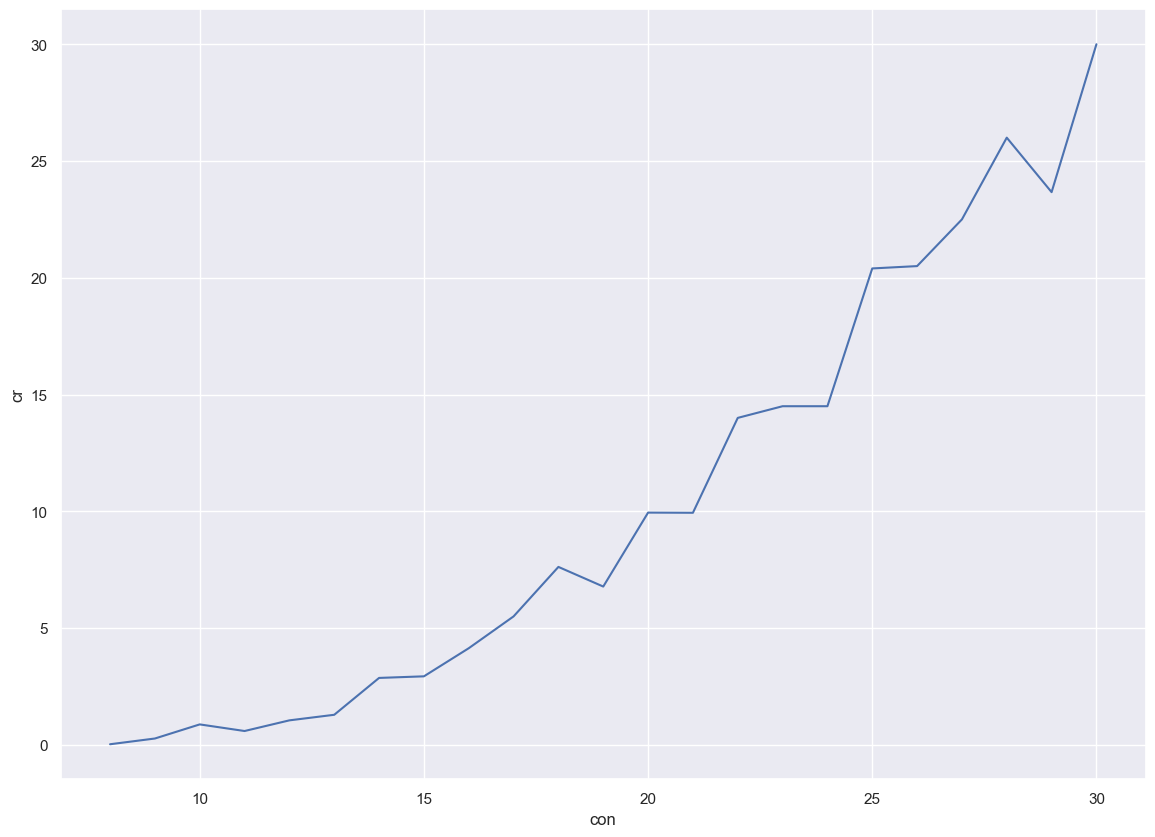

In [28]:
sns.set(rc = {'figure.figsize': (14, 10)})
sns.lineplot(x = 'con', y = 'cr', ci = None, data = fd)
plt.show()

C:\Users\gavin\AppData\Local\Temp\ipykernel_16088\2802165330.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'str', y = 'cr', ci = None, data = fd)


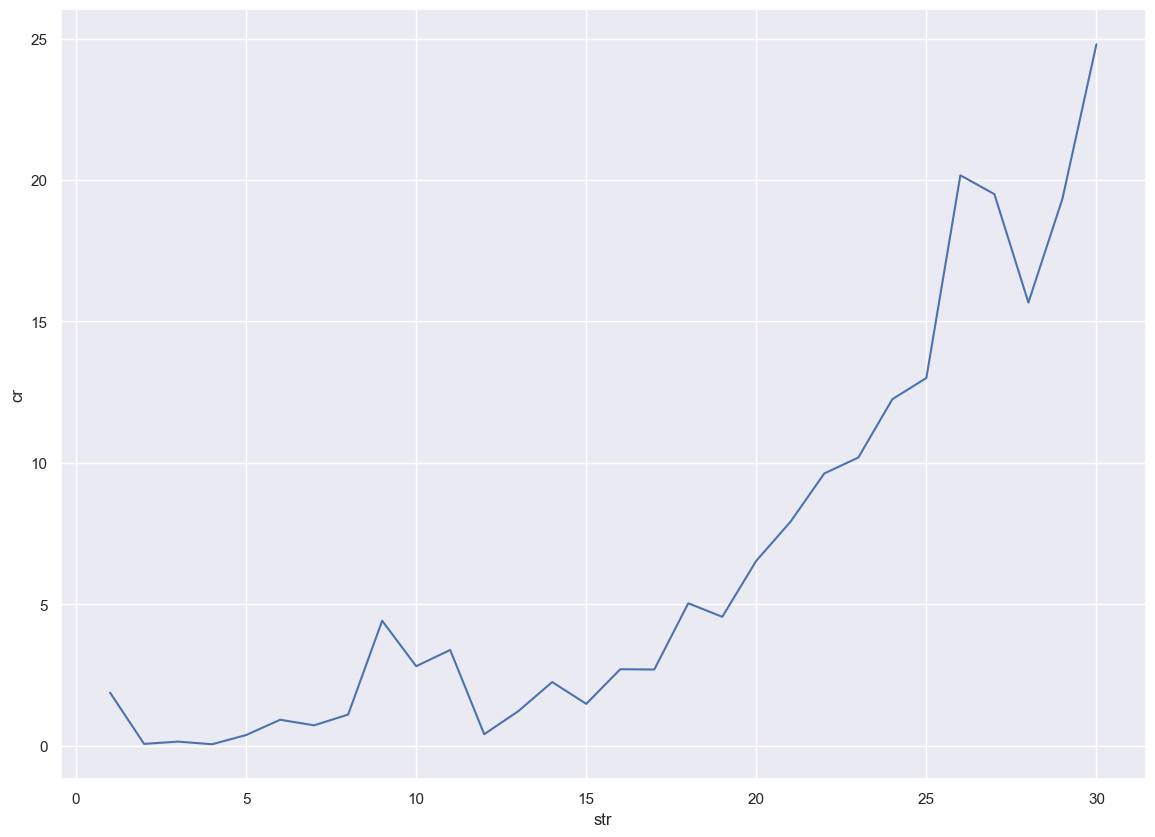

In [29]:
sns.set(rc = {'figure.figsize': (14, 10)})
sns.lineplot(x = 'str', y = 'cr', ci = None, data = fd)
plt.show()

C:\Users\gavin\AppData\Local\Temp\ipykernel_16088\118935724.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'cha', y = 'cr', ci = None, data = fd)


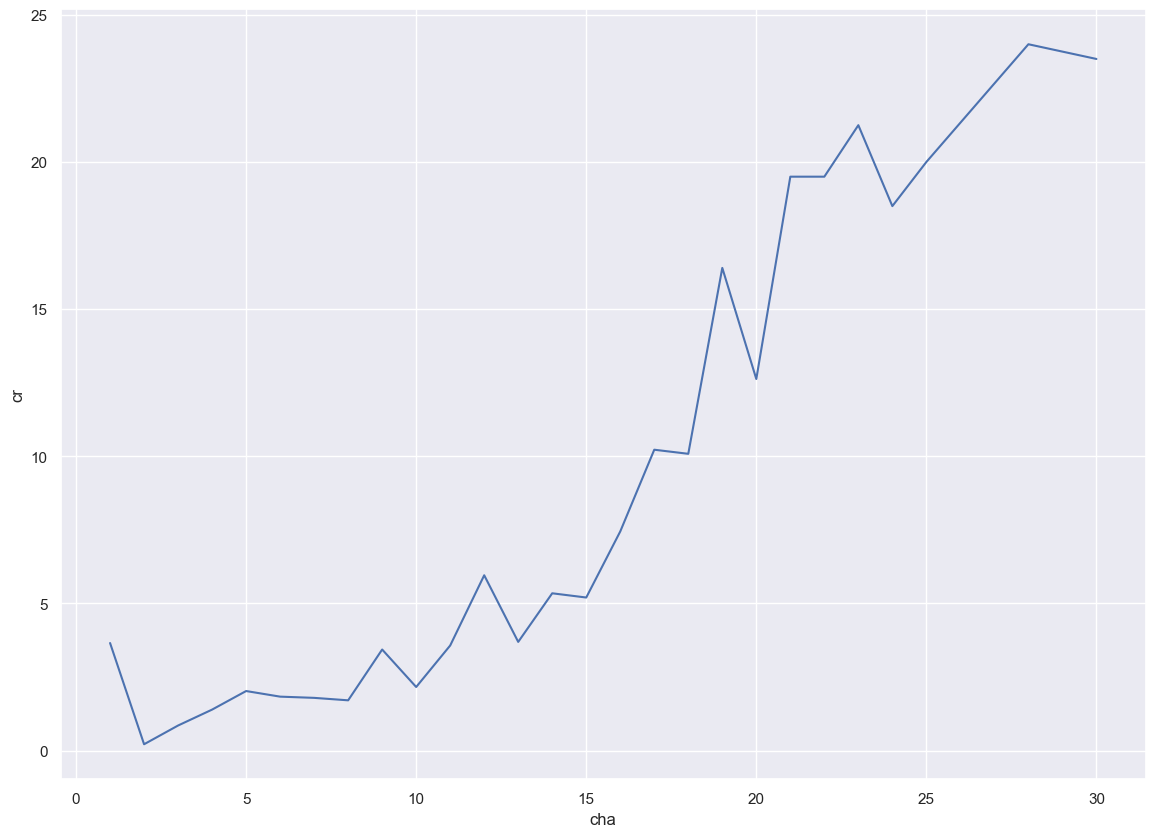

In [30]:
sns.set(rc = {'figure.figsize': (14, 10)})
sns.lineplot(x = 'cha', y = 'cr', ci = None, data = fd)
plt.show()

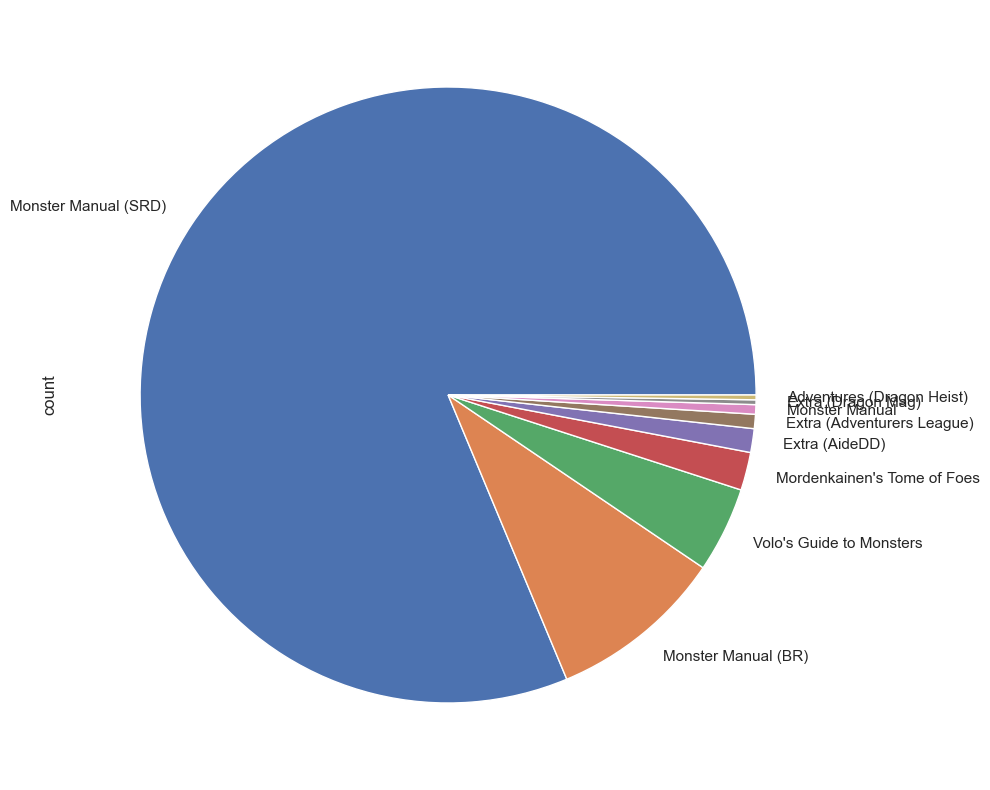

In [31]:
fd['source'].value_counts().plot(kind = 'pie')
plt.show()

spliting dataset into independent and dependent variables

In [32]:
y=fd[['cr']]

In [33]:
X=fd[['ac','hp','size','speed','legendary','source','str','dex','con','int','wis','cha']]

In [34]:
X.sample()

,ac,hp,size,speed,legendary,source,str,dex,con,int,wis,cha
351,11,38,Medium,fly,not legendary,Monster Manual (SRD),12.0,13.0,12.0,7.0,10.0,13.0


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401 entries, 0 to 760
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ac         401 non-null    int64  
 1   hp         401 non-null    int64  
 2   size       401 non-null    object 
 3   speed      401 non-null    object 
 4   legendary  401 non-null    object 
 5   source     401 non-null    object 
 6   str        401 non-null    float64
 7   dex        401 non-null    float64
 8   con        401 non-null    float64
 9   int        401 non-null    float64
 10  wis        401 non-null    float64
 11  cha        401 non-null    float64
dtypes: float64(6), int64(2), object(4)
memory usage: 40.7+ KB


encoding the categorical varaibles

In [36]:
X=pd.get_dummies(X, dtype=int, columns=['size'])
fd.head()

,name,cr,size,ac,hp,speed,align,legendary,source,str,dex,con,int,wis,cha
0,aarakocra,0.25,Medium,12,13,fly,neutral good,not legendary,Monster Manual (BR),10.0,14.0,10.0,11.0,12.0,11.0
2,aboleth,10.00,Large,17,135,swim,lawful evil,Legendary,Monster Manual (SRD),21.0,9.0,15.0,18.0,15.0,18.0
5,acolyte,0.25,Medium,10,9,normal,any alignment,not legendary,Monster Manual (SRD),10.0,10.0,10.0,10.0,14.0,11.0
6,adult-black-dragon,14.00,Huge,19,195,"fly, swim",chaotic evil,Legendary,Monster Manual (SRD),23.0,14.0,21.0,14.0,13.0,17.0
8,adult-blue-dragon,16.00,Huge,19,225,fly,lawful evil,Legendary,Monster Manual (SRD),25.0,10.0,23.0,16.0,15.0,19.0


In [37]:
X=pd.get_dummies(X, dtype=int, drop_first=True)
X.head()

,ac,hp,str,dex,con,int,wis,cha,size_Gargantuan,size_Huge,...,speed_swim,legendary_not legendary,source_Extra (Adventurers League),source_Extra (AideDD),source_Extra (Dragon Mag),source_Monster Manual,source_Monster Manual (BR),source_Monster Manual (SRD),source_Mordenkainen's Tome of Foes,source_Volo's Guide to Monsters
0,12,13,10.0,14.0,10.0,11.0,12.0,11.0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,17,135,21.0,9.0,15.0,18.0,15.0,18.0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,10,9,10.0,10.0,10.0,10.0,14.0,11.0,0,0,...,0,1,0,0,0,0,0,1,0,0
6,19,195,23.0,14.0,21.0,14.0,13.0,17.0,0,1,...,0,0,0,0,0,0,0,1,0,0
8,19,225,25.0,10.0,23.0,16.0,15.0,19.0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [38]:
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                  test_size=.20,
                                                  random_state=20)

In [39]:
regressor1=LinearRegression()
regressor1.fit(X_train.values, y_train)

LinearRegression()

In [40]:
y_pred1=regressor1.predict(X_test.values)
y_pred1[:5]

array([[17.43254453],
       [ 5.48475345],
       [ 5.89887533],
       [ 3.20714905],
       [ 6.14397682]])

In [41]:
print(f"r2_score: {r2_score(y_test,y_pred1):.2f}")
print(f"MSE: {mean_squared_error(y_test,y_pred1):.0f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test,y_pred1)):.0f}")

r2_score: 0.91
MSE: 2
RMSE: 2


In [42]:
#predicting the cr of a monster whose actual cr is 1/4
regressor1.predict([[12,13,10,14,10,11,12,11, 0,0,0,1,0,0, 0,0,0, 1, 0,0,0,0,1,0,0,0]])

array([[0.78676389]])

In [43]:
#predicting the cr of a monster whose actual cr is 10
regressor1.predict([[17,135,21,9,15,18,15,18, 0,0,1,0,0,0, 0,1,0, 0, 0,0,0,0,0,1,0,0]])

array([[11.99326901]])

In [44]:
#predicting the cr of a monster whose actual cr is 1/4
regressor1.predict([[10,9,10,10,10,10,14,11, 0,0,0,1,0,0, 0,1,0, 1, 0,0,0,0,0,1,0,0]])

array([[0.98136692]])

In [45]:
pd.set_option('display.max_columns', None)
X.head()

,ac,hp,str,dex,con,int,wis,cha,size_Gargantuan,size_Huge,size_Large,size_Medium,size_Small,size_Tiny,"speed_fly, swim",speed_normal,speed_swim,legendary_not legendary,source_Extra (Adventurers League),source_Extra (AideDD),source_Extra (Dragon Mag),source_Monster Manual,source_Monster Manual (BR),source_Monster Manual (SRD),source_Mordenkainen's Tome of Foes,source_Volo's Guide to Monsters
0,12,13,10.0,14.0,10.0,11.0,12.0,11.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,17,135,21.0,9.0,15.0,18.0,15.0,18.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
5,10,9,10.0,10.0,10.0,10.0,14.0,11.0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
6,19,195,23.0,14.0,21.0,14.0,13.0,17.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
8,19,225,25.0,10.0,23.0,16.0,15.0,19.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [46]:
print(fd.columns.values)

['name' 'cr' 'size' 'ac' 'hp' 'speed' 'align' 'legendary' 'source' 'str'
 'dex' 'con' 'int' 'wis' 'cha']


In [47]:
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                  test_size=.15,
                                                  random_state=20)

In [48]:
regressor2=LinearRegression()
regressor2.fit(X_train.values, y_train)

LinearRegression()

In [49]:
y_pred2=regressor2.predict(X_test.values)

In [50]:
print(f"r2_score: {r2_score(y_test,y_pred2):.2f}")
print(f"MSE: {mean_squared_error(y_test,y_pred2):.0f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test,y_pred2)):.0f}")

r2_score: 0.94
MSE: 2
RMSE: 1


In [51]:
#predicting the cr of a monster whose actual cr is 1/4
regressor2.predict([[12,13,10,14,10,11,12,11, 0,0,0,1,0,0, 0,0,0, 1, 0,0,0,0,1,0,0,0]])

array([[0.71931938]])

In [52]:
#predicting the cr of a monster whose actual cr is 10
regressor2.predict([[17,135,21,9,15,18,15,18, 0,0,1,0,0,0, 0,1,0, 0, 0,0,0,0,0,1,0,0]])

array([[11.90512978]])

In [53]:
#predicting the cr of a monster whose actual cr is 1/4
regressor1.predict([[10,9,10,10,10,10,14,11, 0,0,0,1,0,0, 0,1,0, 1, 0,0,0,0,0,1,0,0]])

array([[0.98136692]])

In [54]:
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                  test_size=.10,
                                                  random_state=20)

In [55]:
regressor3=LinearRegression()
regressor3.fit(X_train.values, y_train)

LinearRegression()

In [56]:
y_pred3=regressor3.predict(X_test.values)
y_pred3[:5]

array([[17.45371037],
       [ 5.49967291],
       [ 6.14511061],
       [ 3.12861938],
       [ 6.2676375 ]])

In [57]:
print(f"r2_score: {r2_score(y_test,y_pred3):.2f}")
print(f"MSE: {mean_squared_error(y_test,y_pred3):.0f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test,y_pred3)):.0f}")

r2_score: 0.95
MSE: 2
RMSE: 1


In [58]:
#predicting the cr of a monster whose actual cr is 1/4
regressor3.predict([[12,13,10,14,10,11,12,11, 0,0,0,1,0,0, 0,0,0, 1, 0,0,0,0,1,0,0,0]])

array([[0.68373027]])

In [59]:
#predicting the cr of a monster whose actual cr is 10
regressor3.predict([[17,135,21,9,15,18,15,18, 0,0,1,0,0,0, 0,1,0, 0, 0,0,0,0,0,1,0,0]])

array([[11.79534184]])

In [60]:
#predicting the cr of a monster whose actual cr is 1/4
regressor3.predict([[10,9,10,10,10,10,14,11, 0,0,0,1,0,0, 0,1,0, 1, 0,0,0,0,0,1,0,0]])

array([[0.89855395]])

In [61]:
X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                  test_size=.01,
                                                  random_state=60)

In [62]:
regressor4=LinearRegression()
regressor4.fit(X_train.values, y_train)

LinearRegression()

In [63]:
y_pred4=regressor4.predict(X_test.values)

In [64]:
print(f"r2_score: {r2_score(y_test,y_pred4):.2f}")
print(f"MSE: {mean_squared_error(y_test,y_pred4):.0f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test,y_pred4)):.0f}")

r2_score: 0.15
MSE: 1
RMSE: 1


In [65]:
#predicting the cr of a monster whose actual cr is 1/4
regressor4.predict([[12,13,10,14,10,11,12,11, 0,0,0,1,0,0, 0,0,0, 1, 0,0,0,0,1,0,0,0]])

array([[0.68233673]])

In [66]:
#predicting the cr of a monster whose actual cr is 10
regressor4.predict([[17,135,21,9,15,18,15,18, 0,0,1,0,0,0, 0,1,0, 0, 0,0,0,0,0,1,0,0]])

array([[11.53308975]])

In [67]:
#predicting the cr of a monster whose actual cr is 1/4
regressor4.predict([[10,9,10,10,10,10,14,11, 0,0,0,1,0,0, 0,1,0, 1, 0,0,0,0,0,1,0,0]])

array([[0.74845306]])